In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import asarray
from PIL import Image
import seaborn as sns
import cv2
import os

# Test 1 image

In [11]:
test_img = Image.open('12-02-34-112932.png')

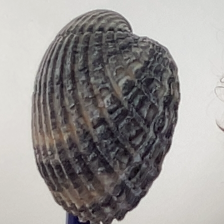

In [12]:
test_img

In [15]:
img_array = np.array(test_img)
img_array


array([[[221, 220, 216],
        [221, 220, 216],
        [223, 221, 217],
        ...,
        [215, 216, 213],
        [214, 215, 212],
        [214, 215, 212]],

       [[223, 221, 217],
        [221, 220, 216],
        [221, 220, 216],
        ...,
        [214, 215, 212],
        [214, 215, 212],
        [215, 216, 213]],

       [[223, 221, 217],
        [221, 220, 216],
        [221, 220, 216],
        ...,
        [214, 215, 212],
        [214, 215, 212],
        [215, 216, 213]],

       ...,

       [[203, 200, 194],
        [202, 199, 193],
        [203, 200, 194],
        ...,
        [193, 189, 184],
        [192, 188, 182],
        [190, 187, 181]],

       [[202, 199, 193],
        [202, 199, 193],
        [202, 199, 193],
        ...,
        [192, 188, 182],
        [190, 187, 181],
        [190, 187, 181]],

       [[201, 198, 192],
        [201, 198, 192],
        [201, 198, 192],
        ...,
        [190, 187, 181],
        [190, 187, 181],
        [190, 187, 181]]

In [16]:
img_array.size

150528

In [17]:
img_array.shape

(224, 224, 3)

# Import Photos

In [2]:
X = []
y = []
classes = ['shells']#,'stones']
base_path = '.'


In [3]:
pwd

'/Users/karenbolon/Documents/spiced_projects/sandbox_dir/image_classifier/data/shells'

In [5]:
PATH = '12-02-34-112932.png'
if os.path.isfile(PATH) and os.access(PATH, os.R_OK):
    print("File exists and is readable")
else:
    print("Either the file is missing or not readable")

File exists and is readable


In [21]:
for i, target in enumerate(classes):
    files = os.listdir(base_path)
    if file.endswith('.png'):
        for file in files:
             # load the image     
            img = Image.open(os.listdir(base_path, file))
             # convert it to an array
            img_array = np.array(img)
             # append the array to X
            X.append(img_array)
        else:
            continue
         # append the numeric target to y

       

In [22]:
X

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [253, 255, 255],
         [253, 255, 255],
         [253, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [253, 255, 255],
         [253, 255, 255],
         [253, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [253, 255, 255],
         [253, 255, 255],
         [253, 255, 255]],
 
        ...,
 
        [[188, 145, 128],
         [186, 141, 124],
         [185, 140, 121],
         ...,
         [227, 229, 217],
         [226, 228, 216],
         [226, 228, 216]],
 
        [[186, 144, 126],
         [187, 142, 125],
         [183, 139, 122],
         ...,
         [227, 229, 217],
         [223, 226, 213],
         [225, 225, 213]],
 
        [[189, 147, 129],
         [188, 145, 128],
         [185, 143, 125],
         ...,
         [225, 227, 214],
  